In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# https://www.kaggle.com/c/titanic/data

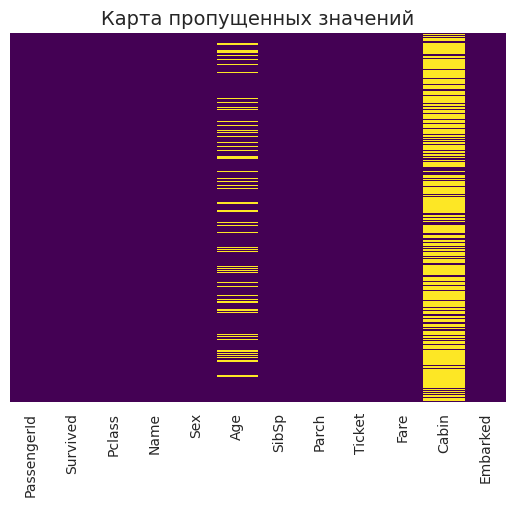

In [2]:
df = pd.read_csv("train.csv")
sns.heatmap(df.isnull(), yticklabels=False, cbar=False,cmap='viridis')
plt.title('Карта пропущенных значений', fontsize=14)
plt.show()

In [3]:
df = pd.read_csv("train.csv")
df.drop(
    labels=['PassengerId',
            # 'SibSp', # кол-во братьев / жен на корабле
            # 'Parch', # кол-во родителей / детей на корабле
            'Ticket', # номер билета
            'Cabin', # номер кабины, много null
            'Embarked', # порт посадки на корабль
            'Name', # имя пассажира
            'Embarked', # место посадки
            'Fare' # плата (билет общий на всю семью)
            ], axis=1, inplace=True)
survived = df.Survived
df.drop(labels=['Survived'], axis=1, inplace=True)
df.Age.fillna(df.Age.mean(), inplace=True)

df.Sex = df.Sex.map({'female': 0, 'male': 1})
df.Age = df.Age.apply(lambda age: max(min(int(age), 50), 0) // 10)

df.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,2,1,0
1,1,0,3,1,0
2,3,0,2,0,0
3,1,0,3,1,0
4,3,1,3,0,0


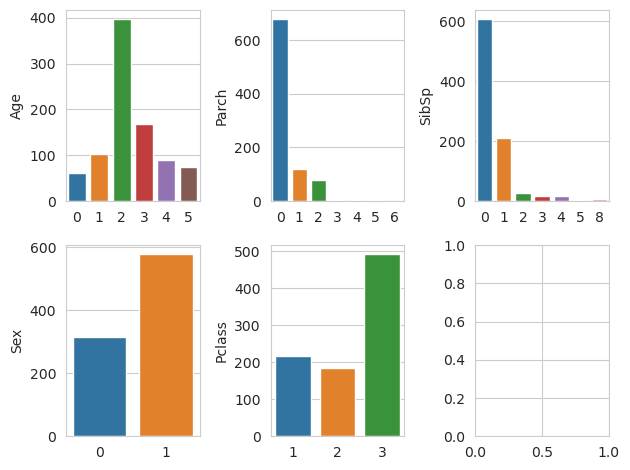

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=3)
sns.barplot(x=df.Age.value_counts().index, y=df.Age.value_counts(), ax=axes[0, 0])
sns.barplot(x=df.Parch.value_counts().index, y=df.Parch.value_counts(), ax=axes[0, 1])
sns.barplot(x=df.SibSp.value_counts().index, y=df.SibSp.value_counts(), ax=axes[0, 2])
sns.barplot(x=df.Sex.value_counts().index, y=df.Sex.value_counts(), ax=axes[1, 0])
sns.barplot(x=df.Pclass.value_counts().index, y=df.Pclass.value_counts(), ax=axes[1, 1])
fig.tight_layout()

In [5]:
encoded_classes = pd.get_dummies(df.Pclass)
encoded_classes.columns = ['Pclass1', 'Pclass2', 'Pclass3']
df = df.join(encoded_classes).drop(labels='Pclass', axis=1)
df.head()

,Sex,Age,SibSp,Parch,Pclass1,Pclass2,Pclass3
0,1,2,1,0,0,0,1
1,0,3,1,0,1,0,0
2,0,2,0,0,0,0,1
3,0,3,1,0,1,0,0
4,1,3,0,0,0,0,1


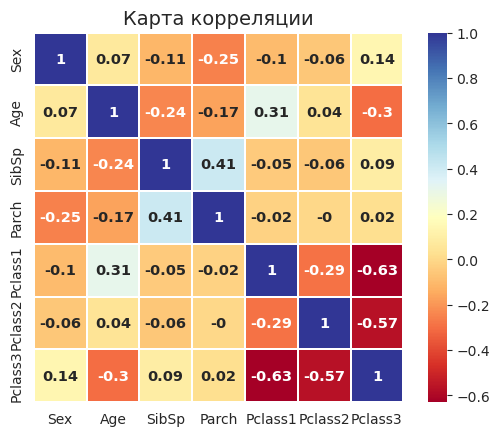

In [6]:
var_corr = round(df.corr(), 2)
# print(var_corr)
mask = np.zeros_like(var_corr)
sns.heatmap(var_corr, mask=mask, square=True, annot=True, annot_kws={'size': 10.5, 'weight': 'bold'}
            , cmap=plt.get_cmap("RdYlBu"), linewidths=.1)
plt.title('Карта корреляции', fontsize=14)
plt.show()
# ~~ чем больше возраст, тем выше пассажирский класс
# ~~ женщины чаще были с семьей

In [7]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Sex      891 non-null    int64
 1   Age      891 non-null    int64
 2   SibSp    891 non-null    int64
 3   Parch    891 non-null    int64
 4   Pclass1  891 non-null    uint8
 5   Pclass2  891 non-null    uint8
 6   Pclass3  891 non-null    uint8
dtypes: int64(4), uint8(3)
memory usage: 30.6 KB


In [8]:
df_train, df_test, survived_train, survived_test = \
    train_test_split(data, survived, test_size=0.2, random_state=0)

In [9]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
model = clf.fit(df_train, survived_train)
print(classification_report(survived_test, model.predict(df_test)))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       110
           1       0.68      0.86      0.76        69

    accuracy                           0.79       179
   macro avg       0.78      0.80      0.78       179
weighted avg       0.81      0.79      0.79       179



In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn_model = knn.fit(df_train, survived_train)
print(classification_report(survived_test, knn_model.predict(df_test)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       110
           1       0.78      0.62      0.69        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



/home/danil/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1.0)
model = svc.fit(df_train, survived_train)
print(classification_report(survived_test, model.predict(df_test)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



/home/danil/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.1, random_state=1)
model = bag.fit(df_train, survived_train)
print(classification_report(survived_test, model.predict(df_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

